<a href="https://colab.research.google.com/github/AtriSaxena/Tensorflow-2.X-Zero2Mastery/blob/main/02_neural_network_classification_Tensoflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with tensorflow

Types of Classification: 

1. Binary classification
2. Multi Class clasification 
3. Multi Label Classification

### Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles 

#Make 1000 examples 
n_samples = 1000 

#Create circles 
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [ ]:
#View Y labels 
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is little hard to understand right now let's visualize it. 


In [ ]:
import pandas as pd

circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


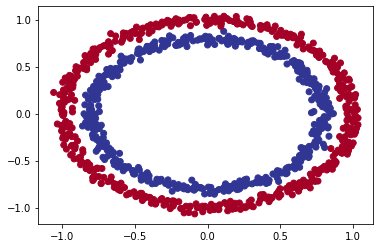

In [ ]:
import matplotlib.pyplot as plt

plt.scatter( X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
## Check the shapes of our features and labels 
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we are looking. 
len(X), len(y)

(1000, 1000)

In [ ]:
# view the first example of features and labels
X[17], y[17]

(array([ 0.1070617, -0.7930922]), 1)

### Steps in modelling

The steps of modelling with tensorflow are typically: 

1. Create or import the model.
2. Compile the model. 
3. Fit the model. 
4. Evaluate the model. 
5. Tweak the model. 
6. Evaluate etc. 

In [ ]:
import tensorflow as tf 
import numpy as np

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
              tf.keras.layers.Dense(1, input_shape=[2])
])

model_1.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#3. fit the model 
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [ ]:
# Let's try and train longer to improve our model 
model_1.fit(X, y, epochs =100,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 932us/step - loss: 0.6932 - accuracy: 0.5000


[0.6932450532913208, 0.5]

Since we are working on a binary classification problem, our model is getting around 50% and So let's add an extra layer. 

In [ ]:
#Set the random seed 
tf.random.set_seed(42)

# 1. Create the model 
model_2 = tf.keras.Sequential([
                  tf.keras.layers.Dense(10, input_shape=[2]),
                  tf.keras.layers.Dense(1)
])

#2. Compile the model 
model_2.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

#fit model 

model_2.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 1.8689 - accuracy: 0.4700
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.5040
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.4660
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.4740
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.5230
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6962 - accuracy: 0.4780
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.4940
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.4860
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.4840
Epoch 11/

In [ ]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 959us/step - loss: 0.6943 - accuracy: 0.5000


[0.6942554712295532, 0.5]

In [ ]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

### Improve our model

Let's look into our bag of tricks to see how we can improve our model. 

1. Create a model: We might to add more layers to or increase the number of hidden units within a layer.
2. Compiling a model: Here we might choose a different optimization function . 
3. Fitting a model: fit for more epochs.

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                tf.keras.layers.Dense(100),
                tf.keras.layers.Dense(10),
                tf.keras.layers.Dense(1)
])

model_3.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_3.fit(X,y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254054069519, 0.5080000162124634]


To visualize our model prediction, let's create a function `plot_decision_boundary()`, this function will: 

* Take in a trained model, feature(X) and labels(y) 
* Create a meshgrid (numpy) of different X values
* Make predictions across the meshgrid 
* Plot the predictions as well as line between zones ( where each unique class falls) 

In [ ]:
import numpy as np 

def plot_decision_boundary(model, X, y): 
  """
  Plots the decision boundary created by a model
  prediction for X
  https://cs231n.github.io/neural-networks-case-study/
  https://madewithml.com/courses/basics/neural-networks/
  """ 
  # Define the axis boundary of the plot and create a meshgrid 
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1 
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100), np.linspace(y_min,y_max,100))

  # Create X_value we are going to make prediction on
  x_in = np.c_[xx.ravel(), yy.ravel()] #stack 2d array together

  # Make predictions 

  y_pred = model.predict(x_in)

  #Check for multi class
  if(len(y_pred[0]) > 1): 
    print("doing multiclass classification")
    #We have to reshape our prediction to get them ready for plotting. 
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else: 
    print("doing binary classfication")
    y_pred = np.round(y_pred).reshape(xx.shape)

  #plot the decision boundary
  plt.contourf(xx,yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min() , yy.max())

doing binary classfication


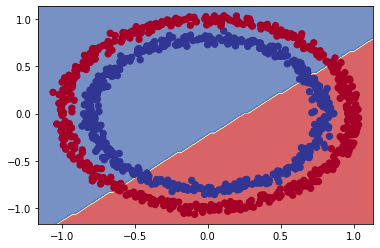

In [ ]:
#Check out the predictions our model is making 
plot_decision_boundary(model= model_3,
                       X=X,
                       y=y)

As we can understand, in above plot the model used is linear (straight line) which is unable to classify the non-linear data. 

So, let's try to add non-linear activation functions and build our model. 

In [ ]:
#set random seed 
tf.random.set_seed(42)

# 1. Create our model. 
model_4 = tf.keras.Sequential([
                  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)   
                            
])
# 2. Compile the model
model_4.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.003),
                metrics=["accuracy"])

# 3. Fit the model 

model_4.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1347 - accuracy: 0.4330
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7758 - accuracy: 0.4300
Epoch 3/100
32/32 [==============================] - 0s 960us/step - loss: 3.2698 - accuracy: 0.4560
Epoch 4/100
32/32 [==============================] - 0s 981us/step - loss: 2.4353 - accuracy: 0.4580
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 1.3525 - accuracy: 0.4630
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0485 - accuracy: 0.4630
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0124 - accuracy: 0.4630
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9961 - accuracy: 0.4620
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9844 - accuracy: 0.4620
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9737 - accuracy: 0.4620
Epoch

In [ ]:
## Let's try to add more layers to the network with non-linear model 

#set random seed

tf.random.set_seed(42)

# 1. build our model 

model_5 = tf.keras.Sequential([
                tf.keras.layers.Dense(4, activation="relu"),
                tf.keras.layers.Dense(4, activation="relu"),
                tf.keras.layers.Dense(1)
])

model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])

model_5.fit(X,y, epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [ ]:
model_5.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classfication


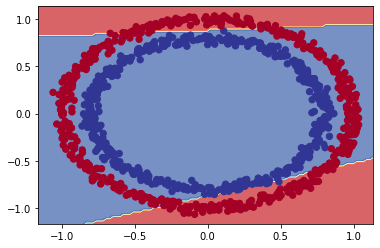

In [ ]:
# lets visualize the predictions

plot_decision_boundary(model_5,X,y)

We have tried adding non-linear activation function in hidden layers but what is wrong why my model is not improving. 

mmmm........

Ohh.. in the final layers we didn't added any activation function. 

For classification problem we can use Sigmoid or Softmax activation function. 

In [ ]:
#set random seed 

model_6 = tf.keras.Sequential([
                    tf.keras.layers.Dense(4, activation="relu", input_shape=[2]),
                    tf.keras.layers.Dense(4, activation="relu"),
                    tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. compile our model
model_6.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5030
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5550
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.5060
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.5040
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.5090
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.5050
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6865 - accuracy: 0.5110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6855 - accuracy: 0.5120
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.5130
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6835 - accuracy: 0.5110
Epoch 11/

In [ ]:
# Lets evaluate the model 
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.1958 - accuracy: 0.9910


[0.19576925039291382, 0.9909999966621399]

doing binary classfication


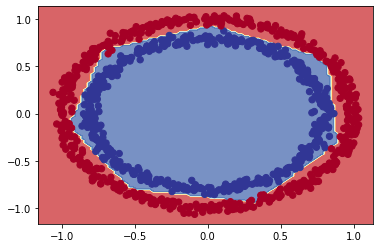

In [ ]:
#WOOOWW... Lets visualize our model 

plot_decision_boundary(model_6,X,y)

🔑 **Note**: The combination of linear and non-linear function is one the key fundamentals of neural networks.

In [ ]:
#Create a toy tensor

A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

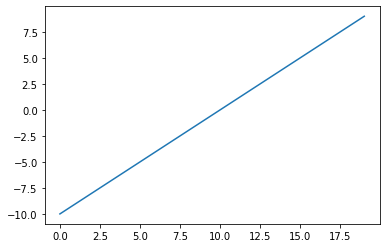

In [ ]:
# Visualize our toy tensor 
plt.plot(A)

In [ ]:
# lets create our sigmoid function 
def sigmoid(x): 
  return 1 / (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

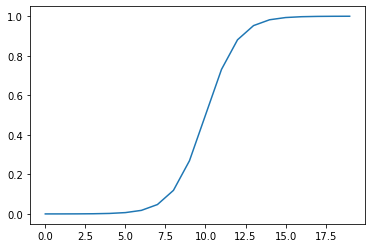

In [ ]:
#Visulize sigmoid function
plt.plot(sigmoid(A))

In [ ]:
#Lets create relu function
def relu(x): 
  return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

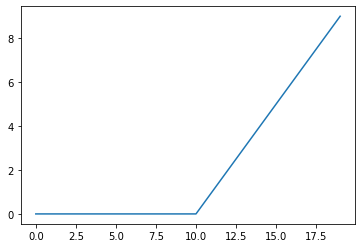

In [ ]:
#lets visualize relu function 

plt.plot(relu(A))

In [ ]:
#linear function 

tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

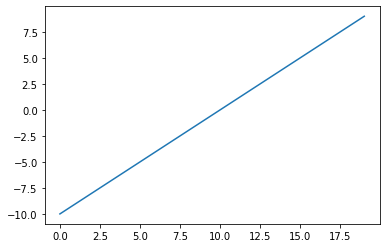

In [ ]:
#visualize linear function
plt.plot(tf.keras.activations.linear(A))

## Training and Evaluating our model 

So far we have been training and evaluating on the same dataset which is a sin in ML. 

Let's create our train and test set.

In [ ]:
# Check how many examples we have 
len(X)

1000

In [ ]:
#lets just split the data 
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((800, 2), (800,), (200, 2), (200,))

In [ ]:
 # Let's create our model to train on training data and evaluate on evaluation model 
tf.random.set_seed(42)

# 1. Create a model 
model_7 = tf.keras.Sequential([
                tf.keras.layers.Dense(4, activation="relu"),
                tf.keras.layers.Dense(4, activation="relu"),
                tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. compile the model 

model_7.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. fit the model 

history = model_7.fit(X_train, y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [ ]:
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

doing binary classfication
doing binary classfication


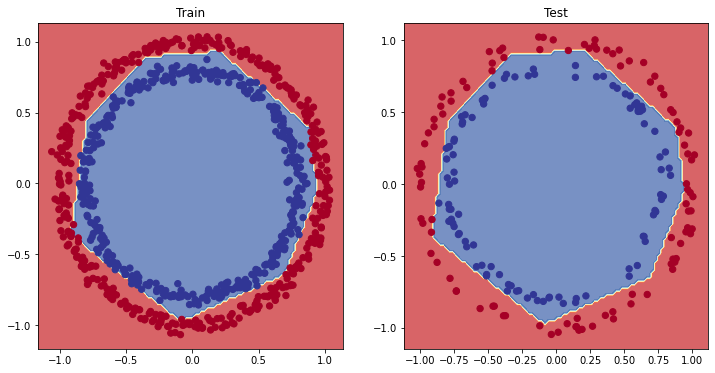

In [ ]:
#Plot the decision boundary for the training and test set 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_7,X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_7,X=X_test, y=y_test)

Text(0.5, 1.0, 'Training accuracy & Loss')

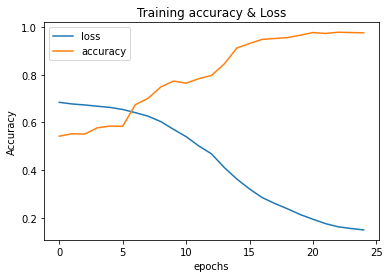

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy & Loss")

## Finding the best learning rate 

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we are going to use following steps: 

* A learning rate **callback**
* Another model 
* A modified loss curves plot 

In [ ]:
#set random seed 
tf.random.set_seed(42) 

#1, Create a model 
model_8 = tf.keras.Sequential([
              tf.keras.layers.Dense(4, activation = "relu"),
              tf.keras.layers.Dense(4, activation = "relu"),
              tf.keras.layers.Dense(1, activation = "sigmoid")
])

# 2 . Compile the model 
model_8.compile(loss= "binary_crossentropy", 
                optimizer= "adam",
                metrics=['accuracy'])

#3. Callback 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#3. fit the model 
history_9 = model_8.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5050
Epoch 11/

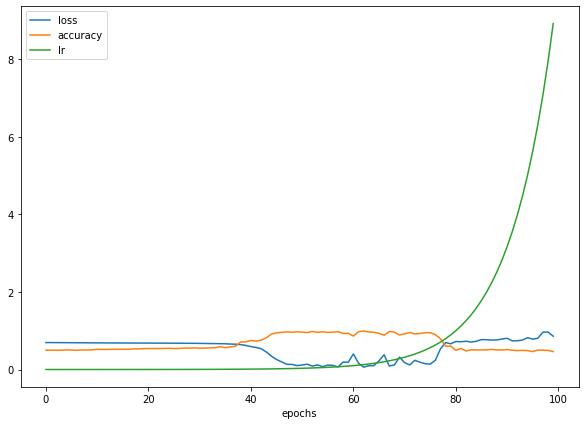

In [ ]:
#checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs loss')

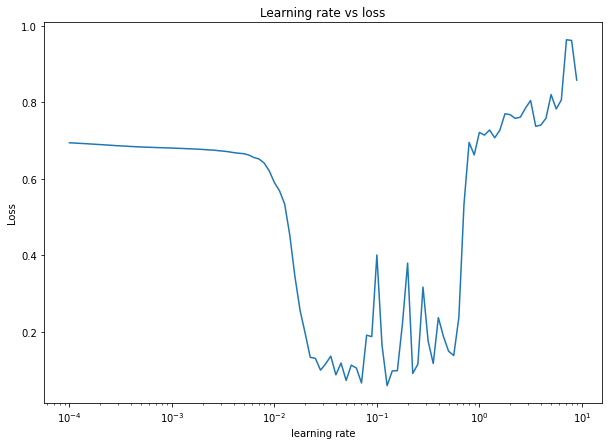

In [ ]:
## Plot the learning rate vs the loss 
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")

From the above graph we can see that at learning rate around 1e-2 the loss decreases steedly. 

So we can use learning rate of 0.02 on same model and try training. 

In [ ]:
#Leaning rate = 0.02 

#Set random seed 
tf.random.set_seed(42)

#1. Compile 
model_9 = tf.keras.Sequential([
              tf.keras.layers.Dense(4, activation = "relu"),
              tf.keras.layers.Dense(4, activation="relu"),
              tf.keras.layers.Dense(1, activation= "sigmoid")                 
              
])

model_9.compile(loss="binary_crossentropy", 
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

model_9.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [ ]:
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740184709429741, 0.9900000095367432]

doing binary classfication
doing binary classfication


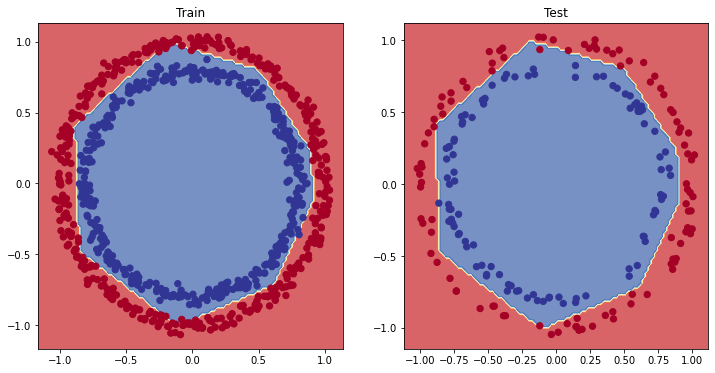

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9, X= X_train, y= y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_9,X=X_test, y = y_test)
plt.show()

### More classification evaluation methods

Alongside visualizing our models results as much as possible , there are handful of other classification evaluation method & metrics you should be familiar with: 

- Accuracy
- Precision 
- Recall 
- F1-score
- Classfication report (from scikit-learn) (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)


In [ ]:
#Check the accuracy of the model 
loss, accuracy = model_9.evaluate(X_test, y_test)
print(f'Model loss on the test dataset: {loss}')
print(f"Model accuracy on the test dataset:{(accuracy*100):.2f}%")


7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test dataset: 0.05740184709429741
Model accuracy on the test dataset:99.00%


##### How about a confusion matrix? 


In [ ]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix 

#Make predictions 
y_preds = model_9.predict(X_test)

#Create confusion matrix
confusion_matrix(y_test,y_preds)

ValueError: ignored

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[9.8526549e-01],
       [9.9923790e-01],
       [9.9032348e-01],
       [9.9706942e-01],
       [3.9623016e-01],
       [1.8126875e-02],
       [9.6829057e-01],
       [1.9746751e-02],
       [9.9967158e-01],
       [5.6460500e-04]], dtype=float32)

Oppss....Looks like our predictions array has come out in **prediction probability** form.. 

In [ ]:
# Convert prediction probability to binary format and view the first 10
tf.round(y_preds)[:10]


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
#Create a confusion matrix 
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

How to pretify our confusion matrix? 


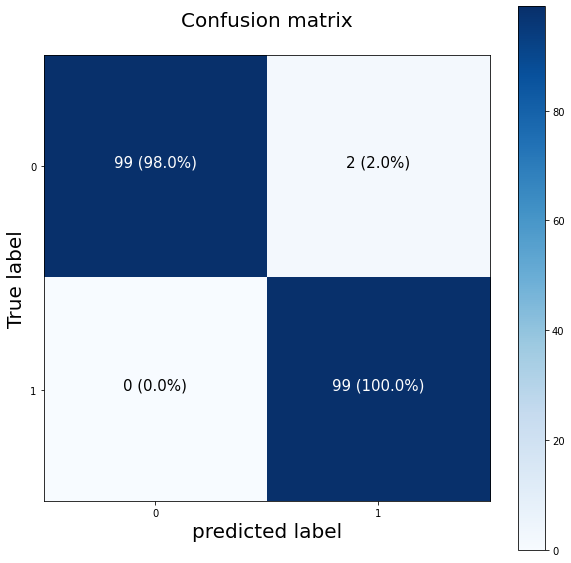

In [ ]:
# The confusion matrix we are about to write is a remix of scikit learn plot_confusion_matrix 
#(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)

import itertools 

figsize = (10,10)

#Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] ##Normalise our data 

n_classes = cm.shape[0]

#Let's pretify it 
fig, ax = plt.subplots(figsize=figsize)

#Create a matrix plot 
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax) 

#Create classes
classes = False 

if classes:
  labels= classes 
else: 
  labels = np.arange(cm.shape[0])

#Label the axes 
ax.set(title = "Confusion matrix", 
       xlabel = "predicted label", 
       ylabel = "True label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

#set xaxis labels to bottom 
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Adjust label size 
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

#Set threshold for different colors. 
threshold = (cm.max() + cm.min()) / 2.

#Plot text on each cell 
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black", 
           size=15
           )


## Working with larger example (Multi class classification) 

When you have more than 2 classes you have multi class classfication. 
* This means if you have 3 different classes, it's multi class classification. 
* It also means if you have 100 classes it a multi class classification. 

To practice multi class classification, we are going to build a neural network to classify images of different items clothings. 
(https://github.com/zalandoresearch/fashion-mnist)

In [ ]:
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist 

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training examples 
print(f'Training sample: {train_images[0]}')
print(f'Testing sample: {train_labels[0]}')


Training sample: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
#Check the shape  
train_images[0].shape , train_labels[0].shape

((28, 28), ())

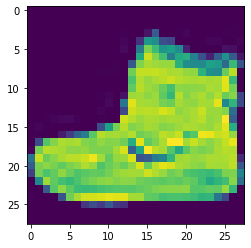

In [ ]:
#Plot a single sample 
import matplotlib.pyplot as plt 
plt.imshow(train_images[0])

In [ ]:
train_labels[0]

9

In [ ]:
class_names = ["TShirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]
len(class_names)

10

Text(0.5, 1.0, 'Sandal')

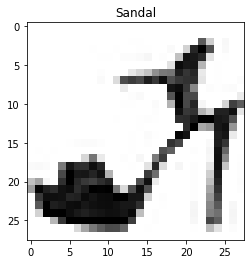

In [ ]:
index = 9
plt.imshow(train_images[index],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

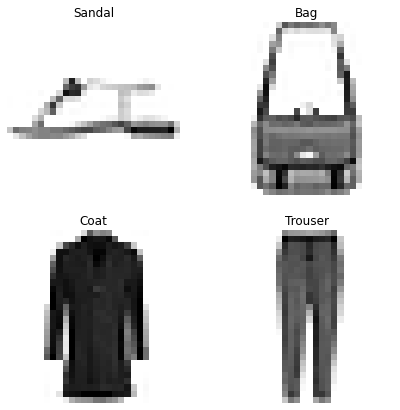

In [ ]:
import random 

plt.figure(figsize = (7,7))
for i in range(4): 
  ax = plt.subplot(2,2, i+1)
  rand_index = random.choice(range(len(train_images)))
  plt.imshow(train_images[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

### Building a multi class classfication model

For our Multiclass classfication model we are going to use a similar architechture as for Binary classification, However we need to tweak some of the things: 

* Input shape: 28 * 28
* Output shape: 10 (one per class of clothing) 
* Loss function: tf.keras.losses.CategoricalCrossEntropy()

`🔑 If labels are in one hot encoding use CategoryCrossEntropy()`

`🔑 If labels are in integers use SparseCategoryCrossEntropy()`

* Output activation: Softmax


In [ ]:
#Set random seed 
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
                tf.keras.layers.Flatten(input_shape=(28,28)),
                tf.keras.layers.Dense(4, activation="relu"),
                tf.keras.layers.Dense(4, activation="relu"),
                tf.keras.layers.Dense(10, activation="softmax")
])

model_10.compile(loss=tf.keras.losses.CategoricalCrossentropy(), 
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

model_10_history = model_10.fit(train_images,tf.one_hot(train_labels, depth=10),epochs=10,validation_data = (test_images,tf.one_hot(test_labels, depth=10)))



Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [ ]:
model_10.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 3140      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Check the min and max value 

train_images.min(), train_images.max()

(0, 255)

Neural network prefer the data to be scaled(or normalized), this means they like to have the number in the tensors they try to find patter between 0 and 1.

In [ ]:
#We can get our train and test data between 0 & 1 by dividing by max 

train_images_norm = train_images/ 255.0 
test_images_norm = test_images/ 255.0 

train_images_norm.min(), train_images_norm.max() 

(0.0, 0.00392156862745098)

In [ ]:
# Now our data is normalized lets write a model to find patterns in the data
 
#set random seed. 
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
                  tf.keras.layers.Flatten(input_shape=(28,28)),
                  tf.keras.layers.Dense(4, activation="relu"),
                  tf.keras.layers.Dense(4, activation="relu"),
                  tf.keras.layers.Dense(10, activation="softmax")
])

model_11.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

model_11_history = model_11.fit(train_images_norm, tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_images_norm, tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.8902 - accuracy: 0.2401 - val_loss: 1.5796 - val_accuracy: 0.3234
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4834 - accuracy: 0.3576 - val_loss: 1.4235 - val_accuracy: 0.4097
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3583 - accuracy: 0.4153 - val_loss: 1.3197 - val_accuracy: 0.4177
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2828 - accuracy: 0.4371 - val_loss: 1.2702 - val_accuracy: 0.4429
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2445 - accuracy: 0.4479 - val_loss: 1.2401 - val_accuracy: 0.4572
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2211 - accuracy: 0.4612 - val_loss: 1.2224 - val_accuracy: 0.4700
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2046 - accuracy: 0.4690 - val_loss: 1.2068 - val_accuracy:

🔑 **Note**: Neural networks prefer data in the numerical form as well as scaled/normalized form.(number between 0 and 1) 

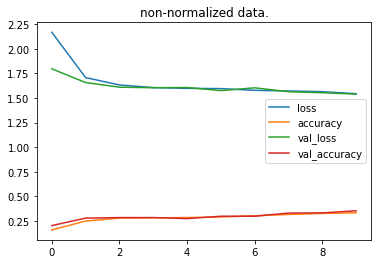

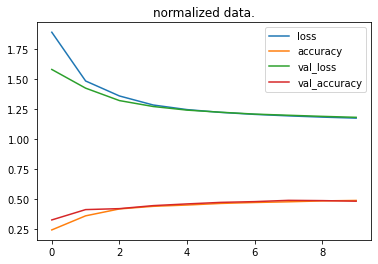

In [ ]:
import pandas as pd 
#Plot non-normalized data loss curve.
pd.DataFrame(model_10_history.history).plot(title="non-normalized data.")
#Plot normalized data loss curve 
pd.DataFrame(model_11_history.history).plot(title="normalized data.")


🔑 **Note**: The same model with even slightly different data can produce drastically different results. So when you are comparing models, it's important to make sure you're comparing them on the same criteria (e.g., same architecture but different data or same data but different architecture.) 

In [ ]:
tf.random.set_seed(42)

#Create model 

model_12 = tf.keras.Sequential([
                  tf.keras.layers.Flatten(input_shape=(28,28)),
                  tf.keras.layers.Dense(4,activation="relu"),
                  tf.keras.layers.Dense(4,activation="relu"), 
                  tf.keras.layers.Dense(10,activation="softmax")
])

#Compile model 
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

#Create the learning rate callback 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

#Fit the model 
find_lr_history = model_12.fit(train_images_norm,
                               train_labels, 
                               epochs=40,
                               validation_data = (test_images_norm, test_labels),
                               callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.8902 - accuracy: 0.2401 - val_loss: 1.5796 - val_accuracy: 0.3234
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4749 - accuracy: 0.3622 - val_loss: 1.4091 - val_accuracy: 0.4086
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3348 - accuracy: 0.4223 - val_loss: 1.2949 - val_accuracy: 0.4246
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2577 - accuracy: 0.4466 - val_loss: 1.2458 - val_accuracy: 0.4459
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2197 - accuracy: 0.4595 - val_loss: 1.2154 - val_accuracy: 0.4673
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1952 - accuracy: 0.4744 - val_loss: 1.1986 - val_accuracy: 0.4871
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1772 - accuracy: 0.4847 - val_loss: 1.1786 - val_accuracy:

Text(0.5, 1.0, 'Find Learning rate')

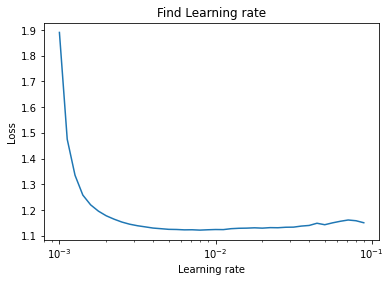

In [ ]:
#Plot learning curve.
lrs = 1e-3 * 10 ** (tf.range(40)/20)
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Find Learning rate")

## Evaluating our multi-class classification model 

To evaluate our multiclass classification model we could: 
* Evaluate its performance using other classification metrics(such as confusion metrics). 
* Access some of its predictions using (through visualization)
* Imporve its result (by training it for longer or changing the architecture) 
* Save and export it for use in an application.

In [ ]:
# Create a confusion matrix 

# The confusion matrix we are about to write is a remix of scikit learn plot_confusion_matrix 
#(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)
import itertools 
from sklearn.metrics import confusion_matrix 

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15): 
  #Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] ##Normalise our data 

  n_classes = cm.shape[0]

  #Let's pretify it 
  fig, ax = plt.subplots(figsize=figsize)

  #Create a matrix plot 
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax) 


  if classes:
    labels= classes 
  else: 
    labels = np.arange(cm.shape[0])

  #Label the axes 
  ax.set(title = "Confusion matrix", 
        xlabel = "predicted label", 
        ylabel = "True label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  #set xaxis labels to bottom 
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size 
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  #Set threshold for different colors. 
  threshold = (cm.max() + cm.min()) / 2.

  #Plot text on each cell 
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black", 
            size=text_size
            )


In [ ]:
#lets make some predictions 
prediction = model_12.predict(test_images_norm)
prediction

array([[5.9747293e-07, 5.7660969e-04, 2.2346068e-12, ..., 4.8068368e-01,
        2.6786828e-03, 1.9373631e-01],
       [3.7656147e-02, 2.8252480e-05, 3.0412534e-02, ..., 6.2329383e-03,
        5.9852844e-01, 2.2052167e-05],
       [6.5487705e-04, 9.7430271e-01, 8.0562262e-07, ..., 3.0485211e-15,
        3.1307772e-11, 1.8718943e-12],
       ...,
       [2.6533697e-02, 1.1476822e-06, 2.6152635e-01, ..., 1.8073751e-04,
        1.2866683e-01, 2.4768275e-07],
       [3.0365821e-03, 9.2087352e-01, 8.5140027e-06, ..., 9.7794263e-14,
        7.8639584e-10, 1.8220557e-11],
       [1.0349582e-03, 4.0267216e-04, 3.5622299e-06, ..., 1.6037656e-01,
        2.0185298e-01, 4.6535847e-03]], dtype=float32)

In [ ]:
prediction[0], tf.argmax(prediction[0]), class_names[tf.argmax(prediction[0])]

(array([5.9747293e-07, 5.7660969e-04, 2.2346068e-12, 2.3516463e-08,
        4.1144621e-09, 3.2232407e-01, 1.5608368e-09, 4.8068368e-01,
        2.6786828e-03, 1.9373631e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=7>,
 'Sneaker')

In [ ]:
#Convert all predictions prob into integers
y_preds = prediction.argmax(axis=1)

#View the first 10 prediction labels 
y_preds[:10]

array([7, 8, 1, 1, 4, 1, 4, 4, 8, 5])

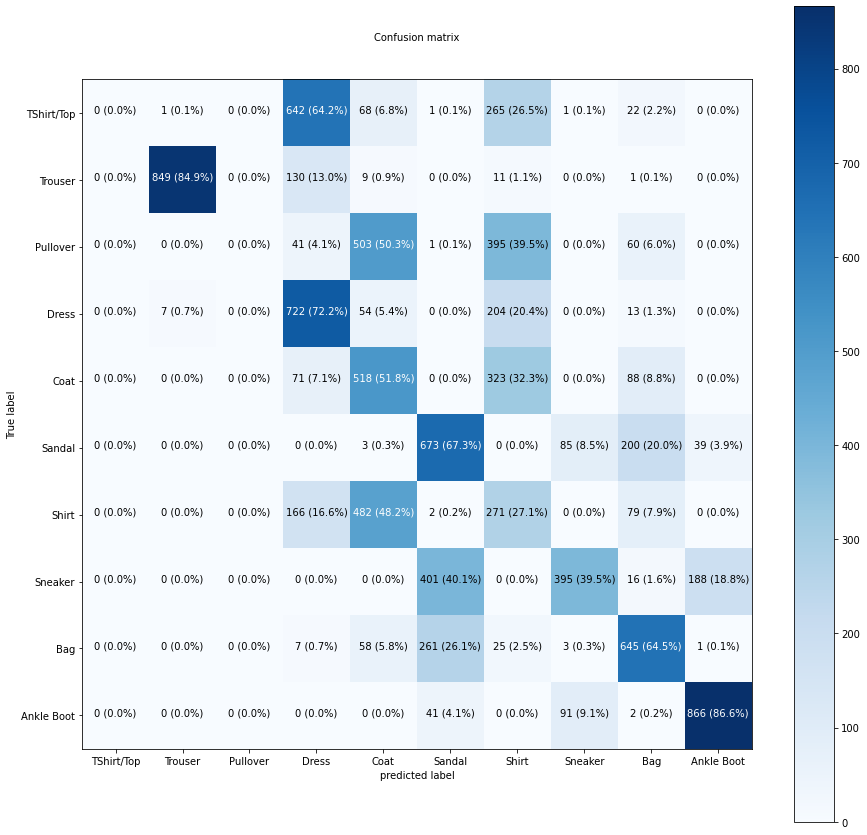

In [ ]:
import numpy as np
make_confusion_matrix(test_labels,y_preds,classes=class_names, figsize=(15,15),text_size=10)

### What patterns is our model is learning 


In [ ]:
#Find the layers of our most recent model 
model_12.layers

In [ ]:
# Extract a particular layers

model_12.layers[1]

In [ ]:
#Get the patterns of a layer in our network
weights, biases = model_12.layers[1].get_weights()

weights, weights.shape

(array([[ 2.8719202e-02, -1.0295436e-02, -2.0460295e+01, -6.1984658e-03],
        [-8.1385076e-02,  3.2228820e-02, -1.0332488e+01,  6.4998612e-02],
        [-4.7761228e-02, -4.8307382e-02, -2.8647739e+01,  3.8801804e-02],
        ...,
        [ 1.5568607e-02,  1.6619451e-02,  5.3086128e+00, -2.3489632e-02],
        [ 1.0950416e-02,  2.6736327e-02,  1.6164497e+01, -7.4611455e-02],
        [-4.8297942e-03,  2.7057998e-02, -7.7578801e-01, -5.8123276e-02]],
       dtype=float32), (784, 4))

Now lets check the bias vector


In [ ]:
#biases 

biases, biases.shape

(array([-0.00599926, -0.00801558,  1.5090529 , -0.00527812], dtype=float32),
 (4,))

In [ ]:
model_12.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_17 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


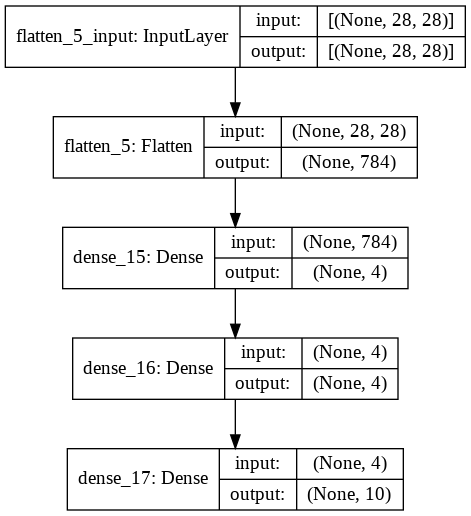

In [ ]:
#Lets check out another way of viewing our deep learning models 

from tensorflow.keras.utils import plot_model 

plot_model(model_12, show_shapes=True)